In [3]:
!pip install facenet-pytorch --quiet
!pip install --upgrade pillow==6.2.2 

In [4]:
import torch
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import urllib.request
url = 'https://raw.githubusercontent.com/na-nora/face-detection/main/nichtEr.png'
image_path = 'nichtEr.png'
urllib.request.urlretrieve(url, image_path)

In [5]:
# Load image using OpenCV (BGR)
bgr_img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=True, device=device)

In [7]:
# Detect face bounding boxes
boxes, probs = mtcnn.detect(rgb_img)

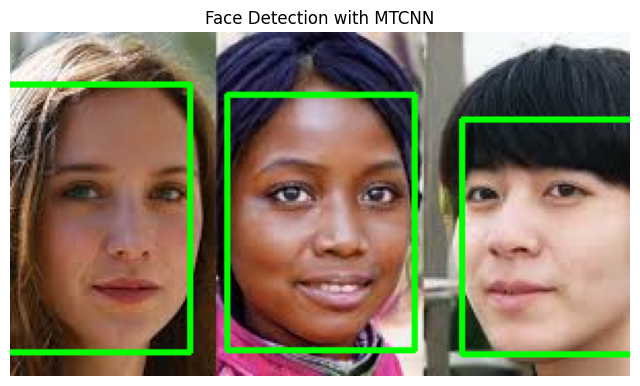

In [8]:
# Draw bounding boxes
def draw_boxes(image, boxes):
    img_copy = image.copy()
    boxes = boxes.tolist() if boxes is not None else []
    for box in boxes or []:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img_copy

# Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(draw_boxes(rgb_img, boxes))
plt.axis('off')
plt.title("Face Detection with MTCNN")
plt.show()

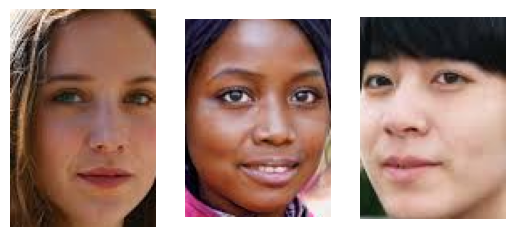

Anzahl erkannter Gesichter: 3


In [10]:
# Show cropped faces

#Cropping
#faces = mtcnn.extract(rgb_img, boxes, save_path=None)
#for i, face in enumerate(faces):
#    face = (face + 1) / 2  # bring Werte von [-1, 1] auf [0, 1]
#    plt.subplot(1, len(faces), i + 1)
#    plt.imshow(face.permute(1, 2, 0).numpy())
#    plt.axis('off')
#plt.show()

# Manuelles Cropping der Gesichter basierend auf den Bounding Boxes
faces_original = []
height, width, _ = rgb_img.shape
if boxes is not None and len(boxes) > 0:  # Überprüfen, ob Boxen existieren
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
         # Begrenze die Koordinaten auf gültige Bildbereiche
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(width, x2)
        y2 = min(height, y2)
        face = rgb_img[y1:y2, x1:x2]  # Ausschneiden aus dem Originalbild
        if face.size > 0:  # Überprüfen, ob das Gesicht (Array) nicht leer ist
             faces_original.append(face)
for i, face in enumerate(faces_original):
    plt.subplot(1, len(faces_original), i + 1)
    plt.imshow(face)
    plt.axis('off')
plt.show()

print(f"Anzahl erkannter Gesichter: {len(faces_original) if boxes is not None else 0}")